In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm


from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

In [2]:
train_path = '/Users/priya/Desktop/ANN assesment/ANN/Pizza Refund/train'
CATEGORIES = ["burnt_pizza", "good_pizza"]

In [3]:
#loading images
import os
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path)
        image = img_to_array(image)
        image = np.array(image)
        data.append(image)
        labels.append(category)


In [4]:
print("Shape is",data[4].shape)
print("Dimensions is",data[4].ndim)

Shape is (224, 224, 3)
Dimensions is 3


In [5]:
labels

['burnt_pizza',
 'burnt_pizza',
 'burnt_pizza',
 'burnt_pizza',
 'burnt_pizza',
 'burnt_pizza',
 'burnt_pizza',
 'burnt_pizza',
 'good_pizza',
 'good_pizza',
 'good_pizza',
 'good_pizza',
 'good_pizza',
 'good_pizza',
 'good_pizza']

In [6]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)
data = np.array(data, dtype="float32")

In [7]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [8]:
print("Shape is",data.shape)
print("Dimensions is",data.ndim)

Shape is (15, 224, 224, 3)
Dimensions is 4


In [9]:
data=data.reshape(15,150528)

## Model 1: Built upon just training dataset (without any split/validation)

In [10]:
model=Sequential()

In [11]:
model.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform',activation='relu',input_dim=150528))
model.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               77070848  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 78,122,498
Trainable params: 78,122,498
Non-trainable params: 0
____________________________________________

In [12]:
answers=model.fit(data,labels,epochs=10,batch_size=5,verbose=2)

Epoch 1/10
3/3 - 1s - loss: 5100.4512 - accuracy: 0.4667
Epoch 2/10
3/3 - 1s - loss: 5759.4502 - accuracy: 0.3333
Epoch 3/10
3/3 - 1s - loss: 1736.3711 - accuracy: 0.4667
Epoch 4/10
3/3 - 2s - loss: 1128.6344 - accuracy: 0.4000
Epoch 5/10
3/3 - 1s - loss: 960.0969 - accuracy: 0.6000
Epoch 6/10
3/3 - 2s - loss: 365.5047 - accuracy: 0.7333
Epoch 7/10
3/3 - 2s - loss: 34.2226 - accuracy: 0.9333
Epoch 8/10
3/3 - 2s - loss: 92.6271 - accuracy: 0.8667
Epoch 9/10
3/3 - 1s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
3/3 - 1s - loss: 1.3824e-28 - accuracy: 1.0000


In [13]:
results = model.evaluate(data,labels)

1/1 [==============================] - 0s 3ms/step - loss: 9.3912 - accuracy: 1.0000


In [14]:
results

[9.3912353515625, 1.0]

In [15]:
from IPython.display import Image, display
dir_path = '/Users/priya/Desktop/ANN assesment/ANN/Pizza Refund/test'
import pandas as pd
df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 

def predict_pizza(dir_path):
  df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 
  for img in os.listdir(dir_path):
    prediction=[]
    img_path = os.path.join(dir_path, img)
    display(Image(filename=img_path))
    temp = img_path.split('/')
    image = load_img(img_path, target_size=(224, 224,3))
    image = img_to_array(image)
    image = image.reshape(1,150528)
    #img_array = np.expand_dims(image, axis=0)
    #image = preprocess_input(img_array)
    prediction = model.predict_classes(image)
    print(prediction)
    if prediction[0] == 1:
        p = 'Good pizza'
        print(p)
    else:
        p = "Burnt pizza"
        print(p)
    df1 = pd.DataFrame({"Image_name":temp[8],"Predictions":[p]})
    df = df.append(df1, ignore_index=True)
  return df

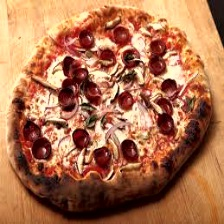

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0]
Burnt pizza


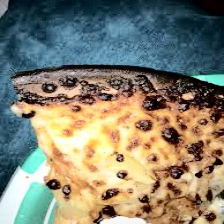

[1]
Good pizza


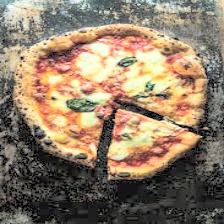

[1]
Good pizza


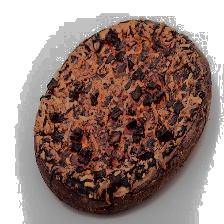

[0]
Burnt pizza


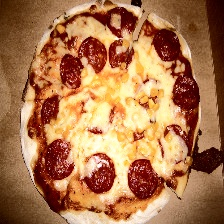

[1]
Good pizza


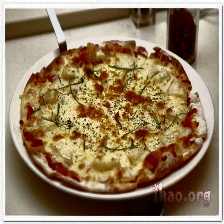

[0]
Burnt pizza


,Image_name,Predictions
0,9.jpg,Burnt pizza
1,11.jpg,Good pizza
2,10.jpg,Good pizza
3,7.jpg,Burnt pizza
4,6.jpg,Good pizza
5,1.jpg,Burnt pizza


In [16]:
res = predict_pizza(dir_path)
res

## MODEL 2: Used train-test split and built the model

In [17]:
model2 = Sequential()

In [18]:
(X_train,X_test,Y_train,Y_test) = train_test_split(data, labels,
    test_size=0.15, stratify=labels, random_state=42)

In [19]:
model2.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform',activation='relu',input_dim=150528))
model2.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model2.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model2.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model2.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform',activation='relu'))
model2.add(Dense(units=2,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               77070848  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 1026      
Total params: 78,122,498
Trainable params: 78,122,498
Non-trainable params: 0
__________________________________________

In [20]:
answers=model2.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=5,verbose=2)

Epoch 1/10
3/3 - 2s - loss: 7724.0308 - accuracy: 0.4167 - val_loss: 1897.5663 - val_accuracy: 0.6667
Epoch 2/10
3/3 - 2s - loss: 5767.5430 - accuracy: 0.3333 - val_loss: 1852.1752 - val_accuracy: 0.6667
Epoch 3/10
3/3 - 2s - loss: 2455.4114 - accuracy: 0.5000 - val_loss: 5761.6069 - val_accuracy: 0.3333
Epoch 4/10
3/3 - 1s - loss: 4509.7065 - accuracy: 0.5000 - val_loss: 270.5085 - val_accuracy: 0.6667
Epoch 5/10
3/3 - 3s - loss: 927.0475 - accuracy: 0.5000 - val_loss: 726.1172 - val_accuracy: 0.6667
Epoch 6/10
3/3 - 1s - loss: 785.4611 - accuracy: 0.5833 - val_loss: 431.1168 - val_accuracy: 0.3333
Epoch 7/10
3/3 - 1s - loss: 832.3926 - accuracy: 0.6667 - val_loss: 1598.1035 - val_accuracy: 0.6667
Epoch 8/10
3/3 - 1s - loss: 700.2531 - accuracy: 0.6667 - val_loss: 1812.2314 - val_accuracy: 0.3333
Epoch 9/10
3/3 - 1s - loss: 704.3430 - accuracy: 0.7500 - val_loss: 602.0286 - val_accuracy: 0.6667
Epoch 10/10
3/3 - 1s - loss: 322.8670 - accuracy: 0.9167 - val_loss: 1606.0148 - val_accura

In [21]:
result_training= model2.evaluate(X_train,Y_train)

1/1 [==============================] - 0s 7ms/step - loss: 155.7979 - accuracy: 0.9167


In [22]:
result_training

[155.7978515625, 0.9166666865348816]

In [23]:
result_testing = model2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 3ms/step - loss: 1606.0148 - accuracy: 0.6667


In [24]:
result_testing

[1606.0147705078125, 0.6666666865348816]

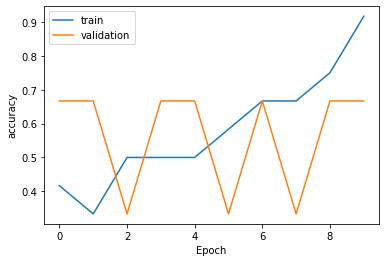

In [25]:
plt.plot(answers.history['accuracy'],label='train');
plt.plot(answers.history['val_accuracy'],label='validation')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend();

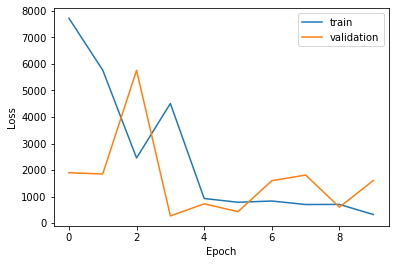

In [26]:
plt.plot(answers.history['loss'],label='train');
plt.plot(answers.history['val_loss'],label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

## MODEL 3: TRAIN-TEST-SPLIT WITH EARLY STOPPING

In [27]:
model3 = Sequential()

In [28]:
model3.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform',activation='relu',input_dim=150528))
model3.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model3.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model3.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu'))
model3.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform',activation='relu'))
model3.add(Dense(units=2,activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               77070848  
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 1026      
Total params: 78,122,498
Trainable params: 78,122,498
Non-trainable params: 0
__________________________________________

In [29]:
from tensorflow.keras.callbacks import Callback 
record= model3.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=5,verbose=True,
                   callbacks=[keras.callbacks.EarlyStopping (monitor='val_loss',
                                                             patience=3,
                                                             min_delta=0.01)])
                                                             #mode='auto')])

Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 4058.9746 - accuracy: 0.5000 - val_loss: 5349.2949 - val_accuracy: 0.6667
Epoch 2/10
3/3 [==============================] - 2s 682ms/step - loss: 5385.1040 - accuracy: 0.5000 - val_loss: 4061.7424 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 1s 433ms/step - loss: 1773.5375 - accuracy: 0.5833 - val_loss: 2170.7991 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 1s 388ms/step - loss: 2035.5903 - accuracy: 0.4167 - val_loss: 2782.3708 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 1s 396ms/step - loss: 1667.6680 - accuracy: 0.6667 - val_loss: 1094.8949 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 1s 415ms/step - loss: 1849.8302 - accuracy: 0.5000 - val_loss: 1445.9965 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 2s 600ms/step - loss: 526.6904 - accuracy: 0.7500 - val_loss: 101.9401 - val_

In [30]:
result1_training= model3.evaluate(X_train,Y_train)

1/1 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [31]:
result1_training

[0.0, 1.0]

In [32]:
result1_testing = model3.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 11ms/step - loss: 482.6529 - accuracy: 0.6667


In [33]:
result1_testing

[482.6529235839844, 0.6666666865348816]

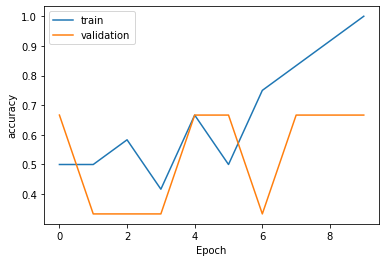

In [34]:
plt.plot(record.history['accuracy'],label='train');
plt.plot(record.history['val_accuracy'],label='validation')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend();

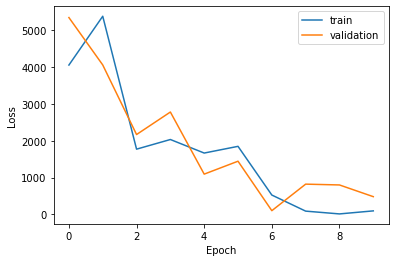

In [35]:
plt.plot(record.history['loss'],label='train');
plt.plot(record.history['val_loss'],label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

In [36]:
from IPython.display import Image, display
dir_path = '/Users/priya/Desktop/ANN assesment/ANN/Pizza Refund/test'
import pandas as pd
df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 

def predict_pizza(dir_path):
  df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 
  for img in os.listdir(dir_path):
    prediction=[]
    img_path = os.path.join(dir_path, img)
    display(Image(filename=img_path))
    temp = img_path.split('/')
    image = load_img(img_path, target_size=(224, 224,3))
    image = img_to_array(image)
    image = image.reshape(1,150528)
    #img_array = np.expand_dims(image, axis=0)
    #image = preprocess_input(img_array)
    prediction = model3.predict_classes(image)
    print(prediction)
    if prediction[0] == 1:
        p = 'Good pizza'
        print(p)
    else:
        p = "Burnt pizza"
        print(p)
    df1 = pd.DataFrame({"Image_name":temp[8],"Predictions":[p]})
    df = df.append(df1, ignore_index=True)
  return df


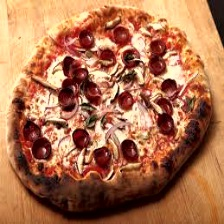

[0]
Burnt pizza


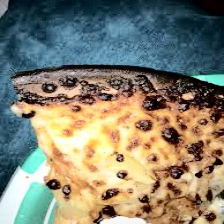

[1]
Good pizza


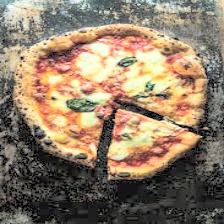

[0]
Burnt pizza


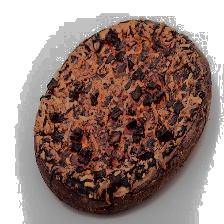

[0]
Burnt pizza


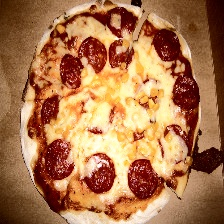

[1]
Good pizza


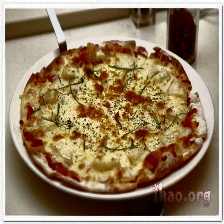

[0]
Burnt pizza


In [37]:
res = predict_pizza(dir_path)


In [38]:
res

,Image_name,Predictions
0,9.jpg,Burnt pizza
1,11.jpg,Good pizza
2,10.jpg,Burnt pizza
3,7.jpg,Burnt pizza
4,6.jpg,Good pizza
5,1.jpg,Burnt pizza


## SUMMARY:
According to me , the dataset size wasn't large enough to split and produce good results.
My model 1 in which I provided my entire training data to just train the model and directly predicted and labelled the unlabelled test data gave me most correct predictions.
Whereas my other model with test train split and early stopping to reduce overfitting didnt produce differences in accuracy as well as didn't provide much correct predictions.
Hence due to smaller dataset I would like to go with my model where I haven't done test train split and export the predictions to csv file as my final predictions.

## FINAL PREDICTIONS VIA MODEL1:

In [39]:
from IPython.display import Image, display
dir_path = '/Users/priya/Desktop/ANN assesment/ANN/Pizza Refund/test'
import pandas as pd
df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 

def predict_pizza(dir_path):
  df = pd.DataFrame([], columns = ['Image_name', 'Predictions']) 
  for img in os.listdir(dir_path):
    prediction=[]
    img_path = os.path.join(dir_path, img)
    display(Image(filename=img_path))
    temp = img_path.split('/')
    image = load_img(img_path, target_size=(224, 224,3))
    image = img_to_array(image)
    image = image.reshape(1,150528)
    #img_array = np.expand_dims(image, axis=0)
    #image = preprocess_input(img_array)
    prediction = model.predict_classes(image)
    print(prediction)
    if prediction[0] == 1:
        p = 'Good pizza'
        print(p)
    else:
        p = "Burnt pizza"
        print(p)
    df1 = pd.DataFrame({"Image_name":temp[8],"Predictions":[p]})
    df = df.append(df1, ignore_index=True)
  return df

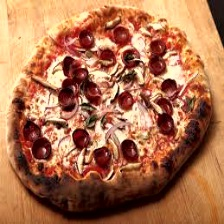

[0]
Burnt pizza


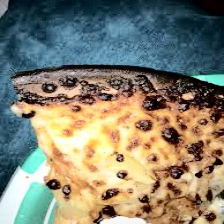

[1]
Good pizza


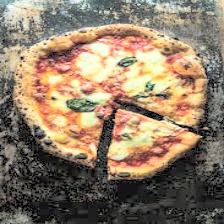

[1]
Good pizza


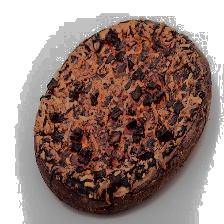

[0]
Burnt pizza


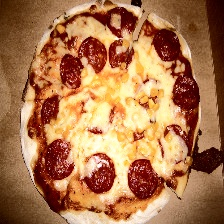

[1]
Good pizza


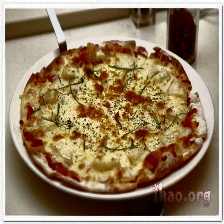

[0]
Burnt pizza


In [40]:
final_res = predict_pizza(dir_path)

In [41]:
final_res

,Image_name,Predictions
0,9.jpg,Burnt pizza
1,11.jpg,Good pizza
2,10.jpg,Good pizza
3,7.jpg,Burnt pizza
4,6.jpg,Good pizza
5,1.jpg,Burnt pizza


In [42]:
final_res.to_csv("Final_test_results.csv")